In [3]:
import yaml

data = {
    'path': '../datasets/dataset_vehiculos',
    'train': 'images/train',
    'val': 'images/val',
    'test': 'images/test',
    'names': {
        0: 'car'
    }
}

with open('datasets/dataset_vehiculos/data.yaml', 'w') as file:
    yaml.dump(data, file,
              default_flow_style=False,
              sort_keys=False)


4. Afinación de YOLO11 (detección) con el dataset
Para poder acceder al modelo pre-entrenado debemos comenzar instalando la librería "ultralytics":

In [4]:
!pip install ultralytics


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from ultralytics import YOLO

# 1. Cargar el modelo (nano, el más pequeño)
model = YOLO("yolo11n.pt")

# Afinar el modelo
results = model.train(data="datasets/dataset_vehiculos/data.yaml",
                      epochs=10, # Número de iteraciones
                      imgsz=640, # Tamaño de las imágenes (máxima dimensión)
                      plots=True, # Guardar gráficos de entrenamiento
                      )

New https://pypi.org/project/ultralytics/8.4.8 available  Update with 'pip install -U ultralytics'
Ultralytics 8.4.7  Python-3.13.5 torch-2.9.1+cpu CPU (AMD Ryzen 7 8700G w/ Radeon 780M Graphics)
engine\trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/dataset_vehiculos/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nb

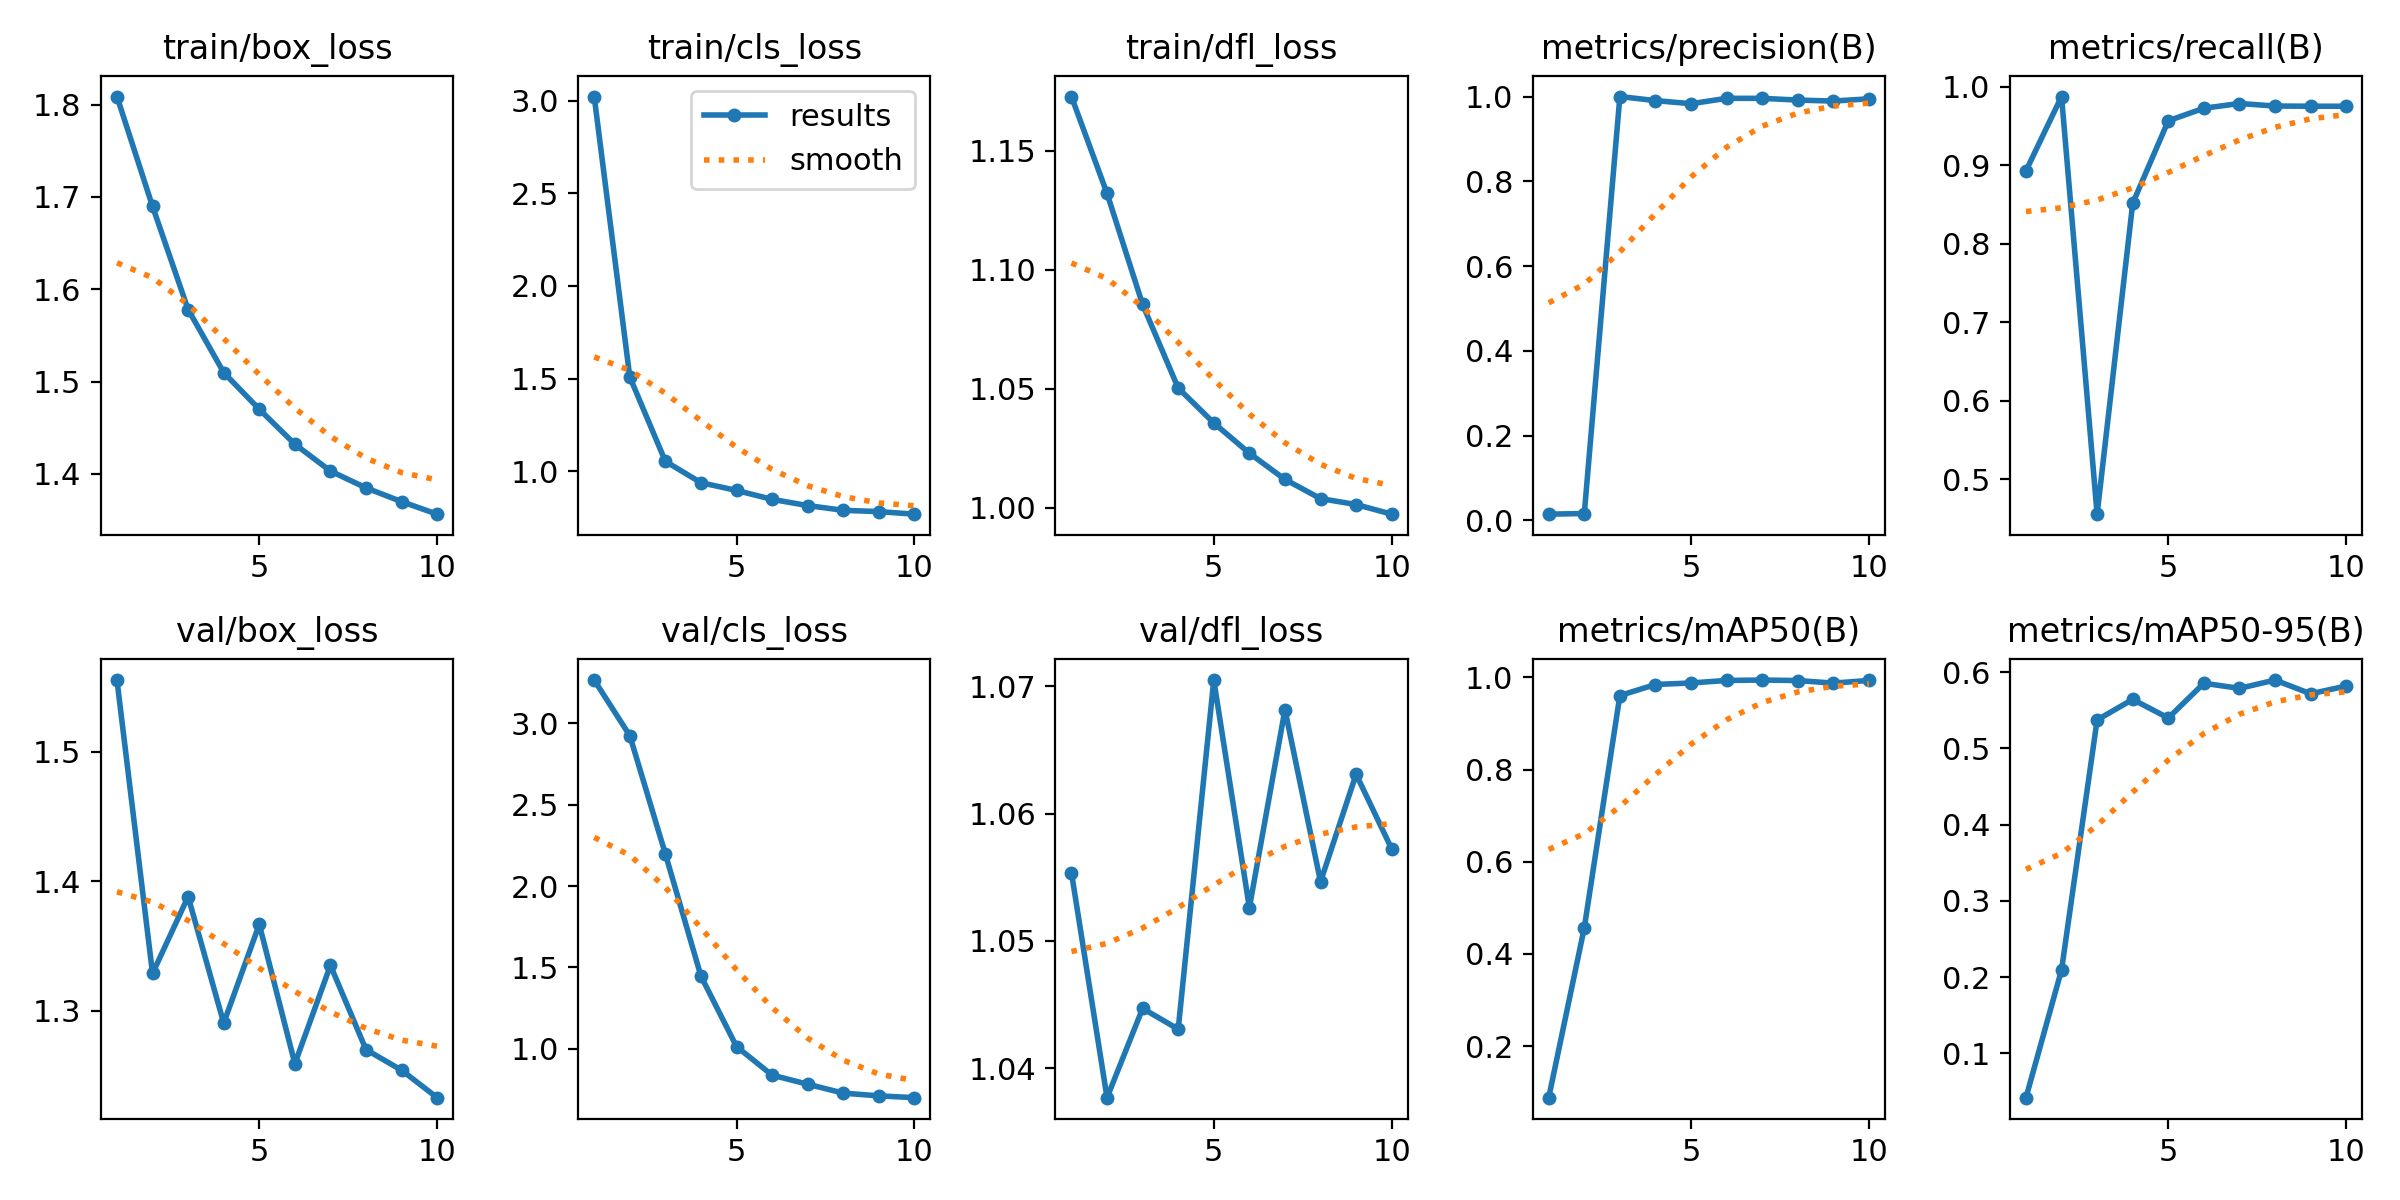

In [6]:
from IPython.display import Image as IPyImage

IPyImage(filename='runs/detect/train/results.png', width=800)

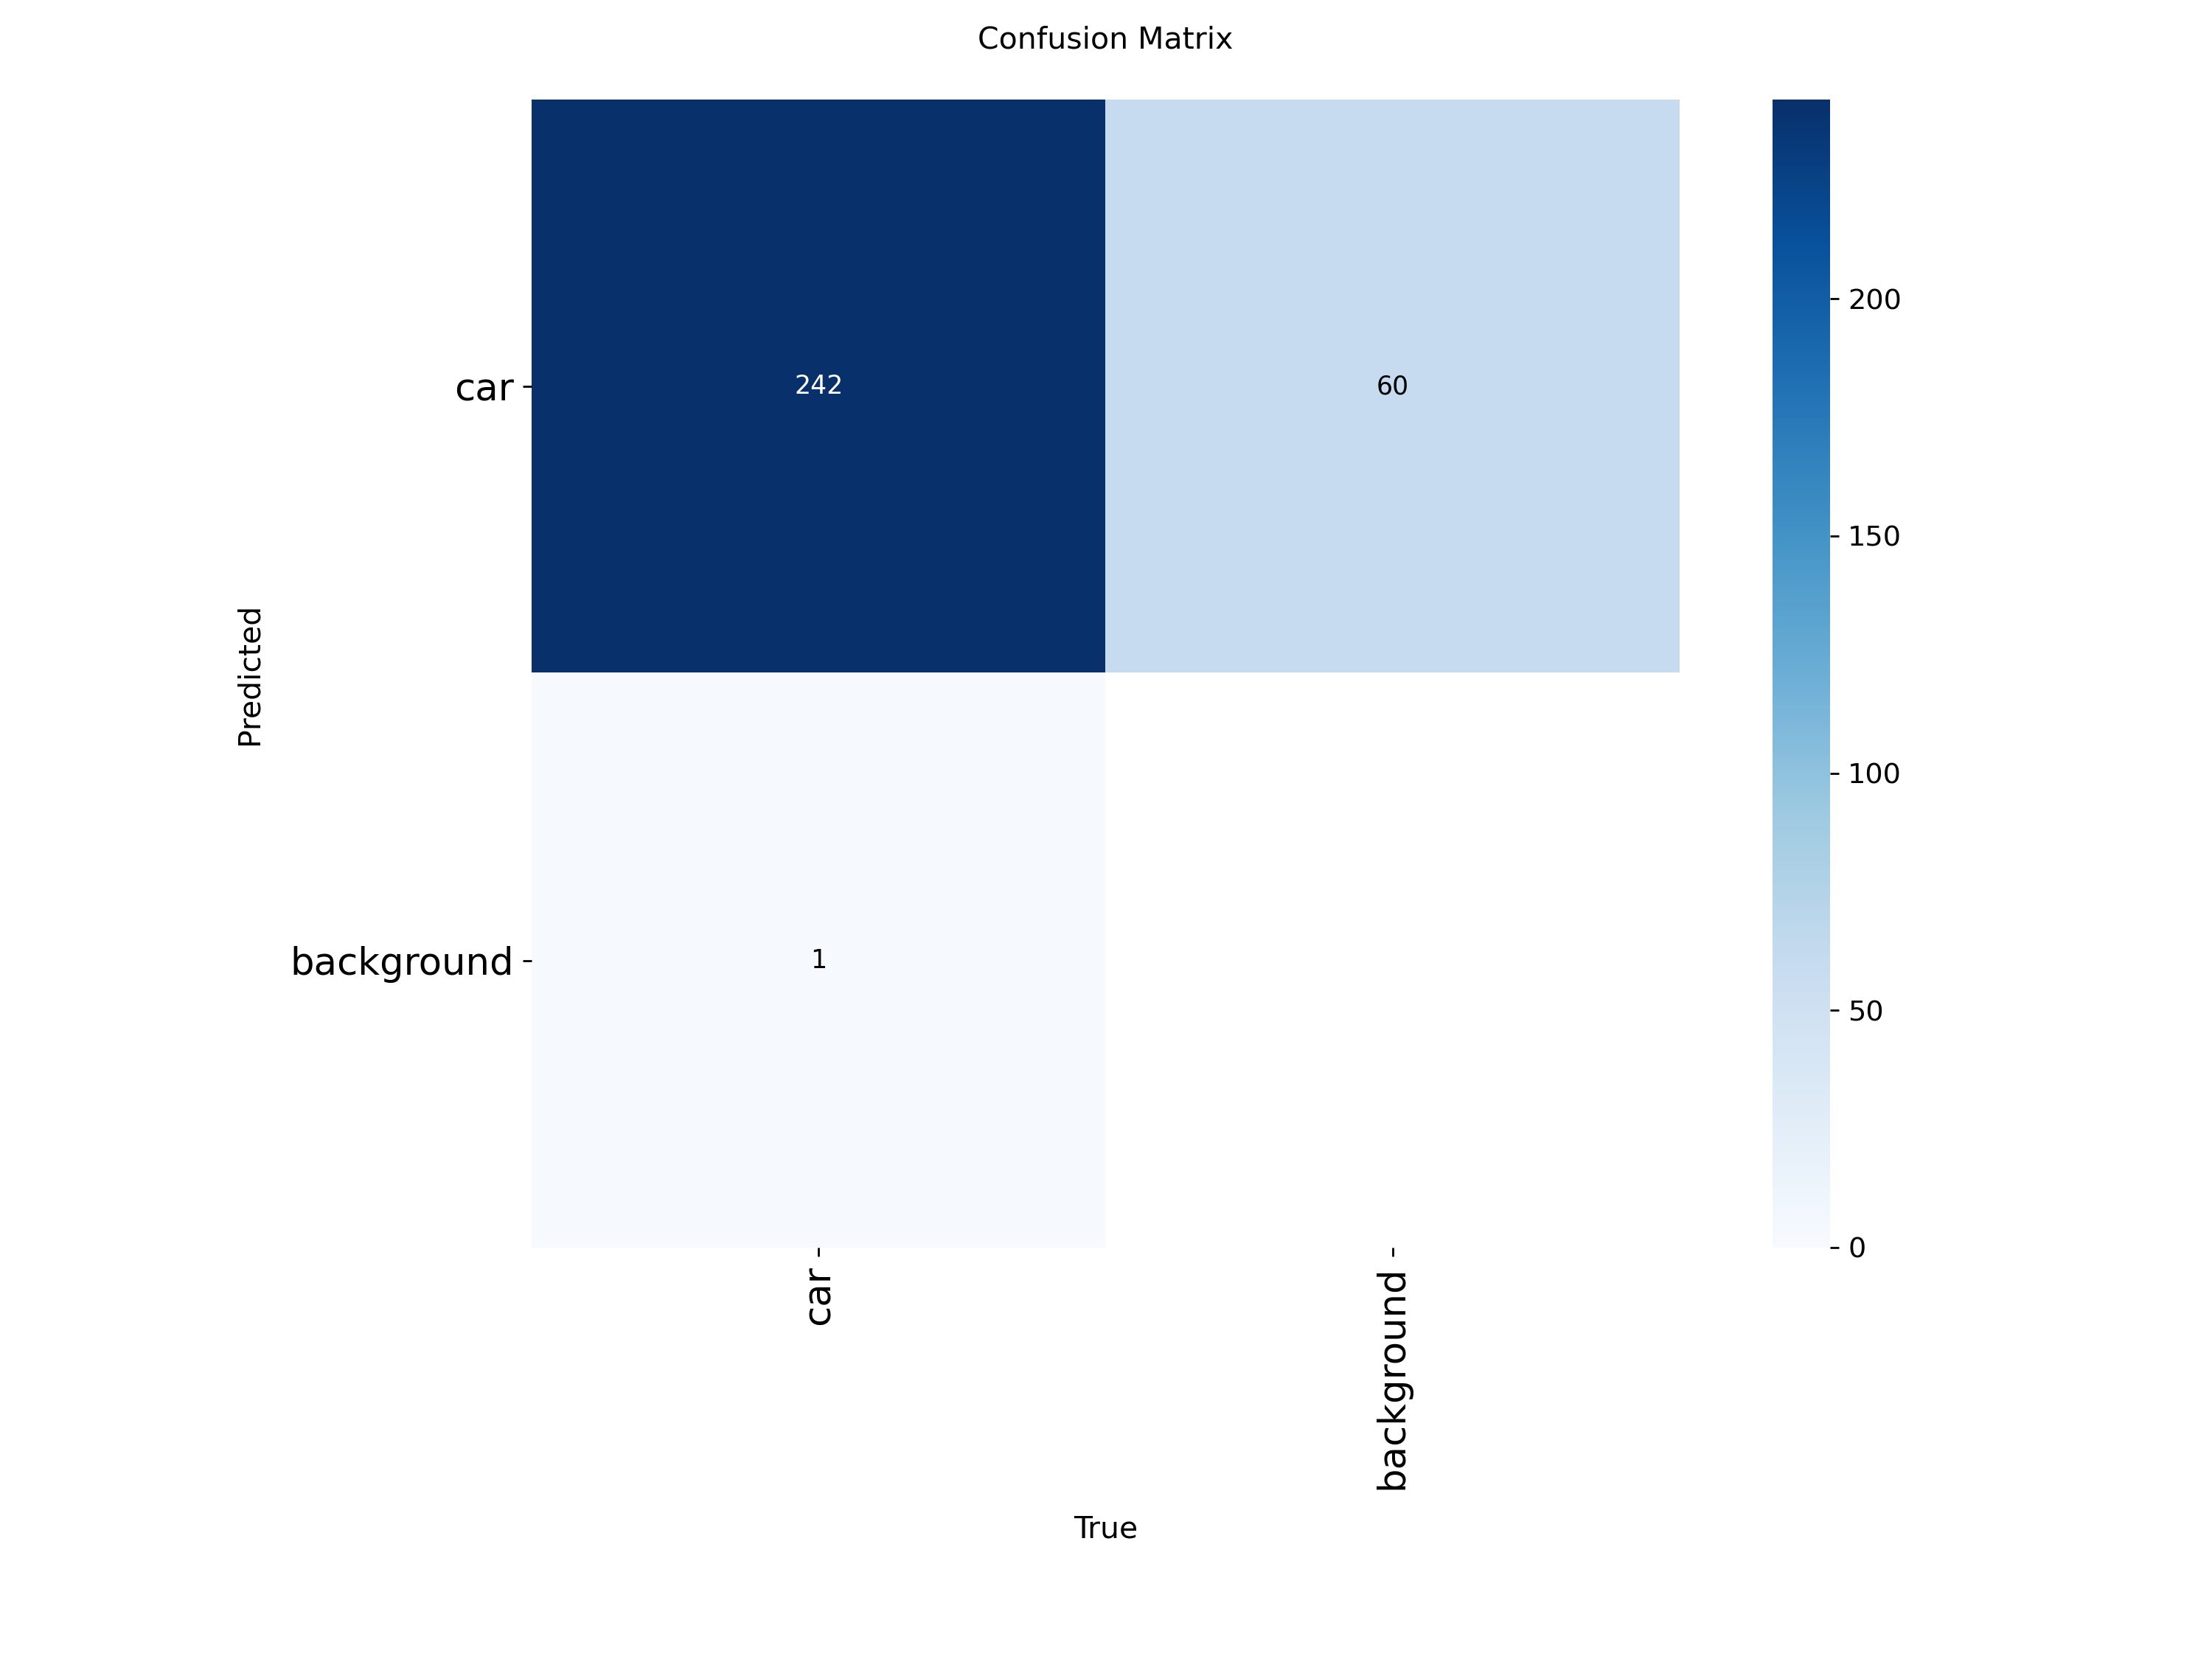

In [7]:
IPyImage(filename='runs/detect/train/confusion_matrix.png', width=600)

In [8]:
model = YOLO('runs/detect/train/weights/best.pt')

In [10]:
preds = model('datasets/dataset_vehiculos/images/test')


image 1/50 d:\BACKEND\ai-webcam-detector\datasets\dataset_vehiculos\images\test\frame_0449.jpg: 384x640 7 cars, 38.6ms
image 2/50 d:\BACKEND\ai-webcam-detector\datasets\dataset_vehiculos\images\test\frame_0450.jpg: 384x640 7 cars, 22.0ms
image 3/50 d:\BACKEND\ai-webcam-detector\datasets\dataset_vehiculos\images\test\frame_0451.jpg: 384x640 5 cars, 21.7ms
image 4/50 d:\BACKEND\ai-webcam-detector\datasets\dataset_vehiculos\images\test\frame_0452.jpg: 384x640 5 cars, 20.7ms
image 5/50 d:\BACKEND\ai-webcam-detector\datasets\dataset_vehiculos\images\test\frame_0453.jpg: 384x640 6 cars, 22.0ms
image 6/50 d:\BACKEND\ai-webcam-detector\datasets\dataset_vehiculos\images\test\frame_0454.jpg: 384x640 6 cars, 20.4ms
image 7/50 d:\BACKEND\ai-webcam-detector\datasets\dataset_vehiculos\images\test\frame_0455.jpg: 384x640 6 cars, 22.0ms
image 8/50 d:\BACKEND\ai-webcam-detector\datasets\dataset_vehiculos\images\test\frame_0456.jpg: 384x640 5 cars, 24.1ms
image 9/50 d:\BACKEND\ai-webcam-detector\datase

In [13]:
# Mostrar predicciones
preds[24].show()

In [14]:
preds = model('datasets/dataset_vehiculos/images/test2')


image 1/1 d:\BACKEND\ai-webcam-detector\datasets\dataset_vehiculos\images\test2\depositphotos_115262096-stock-photo-traffic-on-calle-5-in.jpg: 448x640 7 cars, 38.8ms
Speed: 0.9ms preprocess, 38.8ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


In [16]:
preds[0].show()